# Assignment 7
- Since python is an interpreted language it takes a lot of time to run.
- In this assignment what we are doing is getting the time to execute a particular function and then speeding it with the help of cython library and plotting the graphs to get how much faster the numpy functions and the functions written by us are different.
- The simplest approach for speeding things up is to try and convert the Python code to a lower level language like C, compile it, and then run the compiled code thus we are using cython.

## Cython

*Cython* is a particular variant of the Python language: it introduces several new syntactic elements into the language to address the issues with types and compilation.

In [1]:
# All the Imports
import numpy as np
import timeit
import matplotlib.pyplot as plt
#%matplotlib ipympl

In [2]:
# The naive algorithm for matrix multiplication

def matrix_multiply(u, v):
  m, n = u.shape
  n, p = v.shape
  res = np.zeros((m, p))
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res

## Step I
- For this Step, we multiply two 10x10 matrices with the naive algorithm and the numpy operator.
- The total number of floating-point operations in matrix multiplication depends on the algorithm used.

### Naive Algorithm and the Numpy Operator
- For a 10x10 matrix, there are 100 elements in the result matrix C. For each element, you perform 10 multiplications and 10 additions. So, for the whole matrix multiplication, you have:
- 100 (elements) x 10 (multiplications per element) = 1000 multiplications.
- 100 (elements) x 10 (additions per element) = 1000 additions.
- Total = 2000 Floating Point Operations.


In [3]:
u = np.random.random((10, 10))
v = np.random.random((10, 10))
time = %timeit -q -o -r 3 -n 100 matrix_multiply(u, v)
time2 = %timeit -q -o -r 3 -n 100 u @ v
print("\nFor the Naive Algorithm\nFLOPS =",2000/time.best,"\nGFLOPS =",round(2000/(time.best*1e9), 3),"\n")
print("For the Numpy Algorithm\nFLOPS =",2000/time2.best,"\nGFLOPS =",round(2000/(time2.best*1e9), 3))



For the Naive Algorithm
FLOPS = 4052981.2154450053 
GFLOPS = 0.004 

For the Numpy Algorithm
FLOPS = 1170960050.3284914 
GFLOPS = 1.171


- It is found that the GFLOPS for np.matmul is atleast of the order 100 times of naive multiplication algorithm for smaller matrices.

## Step 2
- The Maximum frequency of the clock that i got in my system is 4.9GHz per core. Which means Gflops = 4.9GHz.
- This is much better than the value of Gflops that we got for both the type of the matrix multiplication.

## Step 3
- For Step 3 I keep on doubling tbe size of the matrix and plot a graph of best time vs the order of the matrix and the GFLOPS vs order graph as well.
- The program stops if the total time of the indiividual matrix multipication method reaches above 5 seconds.
- The graphs are for both the type of algorithms.

In [4]:
# Order
n1 = 10

# Total Time Variables
total_time1, total_time2 = 0, 0

# 10x10 data used from above
x, y1_time, y2_time = [10], [time.best], [time2.best]

# Iter1 for plotting naive
iter, iter1 = 1, 1

while(1):
  # Updating n
  n1 = 10 * 2 ** iter
  u = np.random.random((n1, n1))
  v = np.random.random((n1, n1))

  # -q ensures it doenot display time
  time1 = %timeit -q -o -r 5 -n 5 matrix_multiply(u, v)
  time2 = %timeit -q -o -r 5 -n 5 u @ v
  total_time1 += time1.best*25
  total_time2 += time2.best*25
  iter += 1
  iter1 += 1
  x.append(10*2**iter)
  y1_time.append(time1.best)
  y2_time.append(time2.best)
  if total_time1 > 5:

    # Loop  for continued numpy algorithm
    while(total_time2 < 5):
        n1 = 10 * 2 ** iter
        u = np.random.random((n1, n1))
        v = np.random.random((n1, n1))
        time2 = %timeit -q -o -r 5 -n 5 u @ v
        x.append(10*2**iter)
        y2_time.append(time2.best)
        total_time2 += time2.best*25
        iter+= 1
    break

- As We can see here the numpy algorithm runs much more times than the naive algorithm before reaching the time limit.

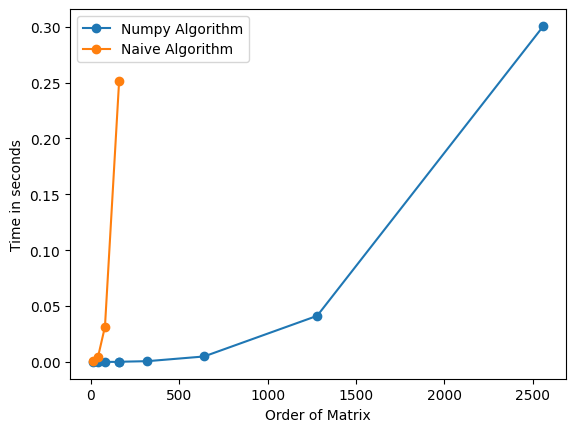

In [5]:
plt.figure()
plt.plot(x, y2_time,marker='o', label='Numpy Algorithm')
plt.plot(x[:iter1], y1_time,marker='o', label='Naive Algorithm')
plt.xlabel("Order of Matrix")
plt.ylabel("Time in seconds")
plt.legend()

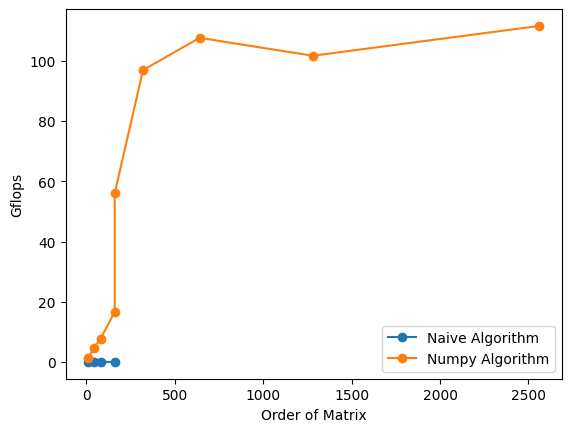

In [6]:
plt.figure()
y_gFlops1 = np.array([(2*((10*2**i))**3)/(y1_time[i]*1e9) for i in range(len(y1_time))])
y_gFlops2 = np.array([(2*((10*2**i))**3)/(y2_time[i]*1e9) for i in range(len(y2_time))])
plt.plot(x[:iter1], y_gFlops1, marker='o',label='Naive Algorithm')
plt.plot(x, y_gFlops2, marker='o', label='Numpy Algorithm')
plt.xlabel("Order of Matrix")
plt.ylabel("Gflops")
plt.legend()
plt.show()

- As N increases, the GFLOPS for np. matmul increases. It increases to almost 5 times the theoretical value. This is due to the fact that numpy uses multiple optimisations for matrix multiplication such as:
1. ***Low-Level Optimizations***: NumPy is implemented in low-level languages like C and can take advantage of the performance optimizations provided by these languages. The matrix multiplication code in NumPy is highly optimized, making efficient use of CPU and memory.

2. ***Parallelism:*** NumPy and the underlying libraries can utilize multiple CPU cores and vectorized instructions.

3. ***Cache Optimization:*** The libraries that NumPy uses are designed to minimize cache misses and efficiently utilize the CPU cache hierarchy, which can have a substantial impact on performance.

4. ***Algorithmic Optimizations:*** NumPy's matmul may use more advanced matrix multiplication algorithms (e.g., Strassen's algorithm for large matrices) for improved efficiency, which naive algorithms typically lack.

5. ***Data Alignment:*** NumPy ensures that data is suitably aligned in memory, which can lead to better performance due to improved memory access patterns.

6. ***Compilation and Just-In-Time (JIT) Compilation***: Some operations in NumPy may be compiled or JIT-compiled to machine code, which can lead to significant speed improvements.
- GFLOPS is a characteristic of the computational power of the Processor (or Core) being used. Finding GFLOPS this way, hence, is absurd as the algorithm used by NumPy does not resemble the GFLOPS. It can use algorithms that use lesser floating point operations than this. What this data actually tells you is how well-optimized the numpy code is and how parallel processing and multiple cores are used to get a very fast execution of the algorithm.


## Step 4
- In this step we first load cython and then try to optimize the matmul function written by us.

In [7]:
%load_ext Cython

In [8]:
%%cython --a
import cython
import numpy as np

def cbasic_matrix_multiply(u, v):
  m, n = u.shape
  n, p = v.shape
  res = np.zeros((m, p))
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res


In [10]:
u = np.random.random((50, 50))
v = np.random.random((50, 50))
%timeit -n 1 -r 1 matrix_multiply(u, v)
%timeit -n 1 -r 1 cbasic_matrix_multiply(u, v)

69.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
60.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- Here we can see after using cython the time reduces a bit.

## Step 5
- For step 5 we will make step by step changes and check the runtime. The changes are-
1. Declare each of the variables i, j, k, m, n, p as int types
2. Use the decorator function @cython.boundscheck(False).
3. Declare the input variables to be of type double[:, :]
4. Initializing res as double[:]
5. Change the data type to float[:,:]


### Part 1
- Declare each of the variables i, j, k, m, n, p as int types

In [11]:
%%cython -a
import cython
import numpy as np

def cbasic_matrix_multiply1(u, v):
  cdef int m, n, p
  cdef int i, j, k
  m = u.shape[0]
  n = u.shape[1]
  p = v.shape[1]
  res = np.zeros((m, p))
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res


In [12]:
%timeit -n 1 -r 1 matrix_multiply(u, v)
%timeit -n 1 -r 1 cbasic_matrix_multiply1(u, v)

69 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
56.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- After defining i, j, k, m, n, p as integers there is somewhat decrease in the time.

### Part 2
- Use the decorator function @cython.boundscheck(False).

In [13]:
%%cython -a
import cython
import numpy as np
@cython.boundscheck(False)

def cbasic_matrix_multiply2(u, v):
  cdef int m, n, p
  cdef int i, j, k
  m = u.shape[0]
  n = u.shape[1]
  p = v.shape[1]
  res = np.zeros((m, p))
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res

In [14]:
%timeit -n 1 -r 1 matrix_multiply(u, v)
%timeit -n 1 -r 1 cbasic_matrix_multiply2(u, v)

68.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
56.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- When we apply @cython.boundscheck(False) to a function or method, it tells Cython to skip array bounds checking for the array indexing operations within that function or method. This can lead to faster array access, especially in situations where you are confident that your array indexing is within valid bounds.
- Thus using @cython.boundscheck(False) reduces time by a small amount.

### Part 3
- Declare the input variables to be of type double[:, :].

In [15]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cbasic_matrix_multiply3(double[:,:] u, double[:,:] v):
  cdef int m, n, p
  cdef int i, j, k
  m = u.shape[0]
  n = u.shape[1]
  p = v.shape[1]
  res = np.zeros((m, p))
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res

In [16]:
%timeit -n 1 -r 1 matrix_multiply(u, v)
%timeit -n 1 -r 1 cbasic_matrix_multiply3(u, v)

67.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
29.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- Declaring the parameters as doubles decreases the time a lot.

### Part 4
- Initializing res as double[:].

In [17]:
%%cython -a
import cython
import numpy as np

@cython.boundscheck(False)
def cbasic_matrix_multiply4(double[:,:] u, double[:,:] v,double[:,:] res):
  cdef int m, n, p
  cdef int i, j, k
  m = u.shape[0]
  n = u.shape[1]
  p = v.shape[1]
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res

In [18]:
%timeit -n 1 -r 1 matrix_multiply(u, v)
res = np.zeros((50,50))
%timeit -n 1 -r 1 cbasic_matrix_multiply4(u, v, res)

70.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
182 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- Taking res as the input parameter and making it a double array is by far the best step which makes the computatuion of time the fastest.

### Part 5
- Change the data type to float[:,:].

In [19]:
%%cython -a
import cython
import numpy as np
@cython.boundscheck(False)
def cbasic_matrix_multiply5(float[:,:] u, float[:,:] v,float[:,:] res):
  cdef int m, n, p
  cdef int i, j, k
  m = u.shape[0]
  n = u.shape[1]
  p = v.shape[1]
  for i in range(m):
    for j in range(p):
      for k in range(n):
        res[i,j] += u[i,k] * v[k,j]
  return res

In [24]:
%timeit -n 1 -r 1 matrix_multiply(u, v)

u = u.astype(np.float32)
v = v.astype(np.float32)
res = np.zeros((50,50))
res = res.astype(np.float32)
%timeit -n 10 -r 10 cbasic_matrix_multiply5(u, v, res)
%timeit -n 10 -r 10 u @ v

76.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
132 µs ± 11.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
20.2 µs ± 1.75 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


- Declaring them as float instead of double decreases a small amount of time as less bits are used.
- When comparing Numpy value with the cython optimization we notice numpy one is still lower.


## Conclusions
- We can conclude from the above that numpy algortihm not only uses cython optimizations it also uses some other processes like -
1. Parallelism: NumPy and the underlying libraries can utilize multiple CPU cores and vectorized instructions (e.g., SIMD instructions) to perform operations in parallel, which significantly speeds up matrix multiplication.

2. Cache Optimization: The libraries that NumPy uses are designed to minimize cache misses and efficiently utilize the CPU cache hierarchy, which can have a substantial impact on performance.

3. Memory Management: NumPy and the underlying libraries manage memory efficiently, minimizing memory allocation and deallocation overhead, which can slow down a naive algorithm.

- Using cython speeds up our functions a lot and thus shows us the need of low level languages like C.
- While using cython declaration of the datatype input parameters and mainly the datatype of ouptut value decreases the time by the maximum amount.